In [1]:
from IPython.display import Image

# International Investment Matrix

The investment network recipe follows the approach in Vohm Lehn-Winberry's paper. Instead of mapping the BEA codes, from which the investment flows are derived, to their 37 sector aggregates, we map it to OECD's sectoral aggregates based on ISIC4 codes. The network is derived from data spanning 2000-2021. The process requires a few assumptions described in the paper, which align as much as possible to the BEA's methodology when constructing their capital flow tables (only available for a few years and missing intellectual property investments). The process essentially requires getting estimates for the weight $\omega_{iat}$ in the below network construction equation.

$$I_{ijt}=\sum_{a=1}^{A}\omega_{iat}I_{ajt}^{exp}$$

Where $I_{ijt}$ is the yearly investment network and $I_{ajt}^{exp}$ is an asset expenditure matrix, $a\in A$ is some asset produced by sector $i$ and purchased by sector $j$ at time $t$. The key assumption is that the mix of sectors producing asset $a$ is the same for all sectors $j$ (i.e. $\omega_{iat}$ is independent of $j$) To get the investment network recipe, we set $R_{ij}=\sum_{t}{I_{ijt}}$. 

We took two approaches to creating an international investment matrix based on this recipe. The first uses only data from ICIO while the latter uses OECD data on capital formation from table SNA\_TABLE8A. While the former is less granular and assumes the same production/expenditure makeup for each country, the latter uses less reliable data.

### Investment Matrix Recipe based on VomLehn Winberry ($R_{ij}$)

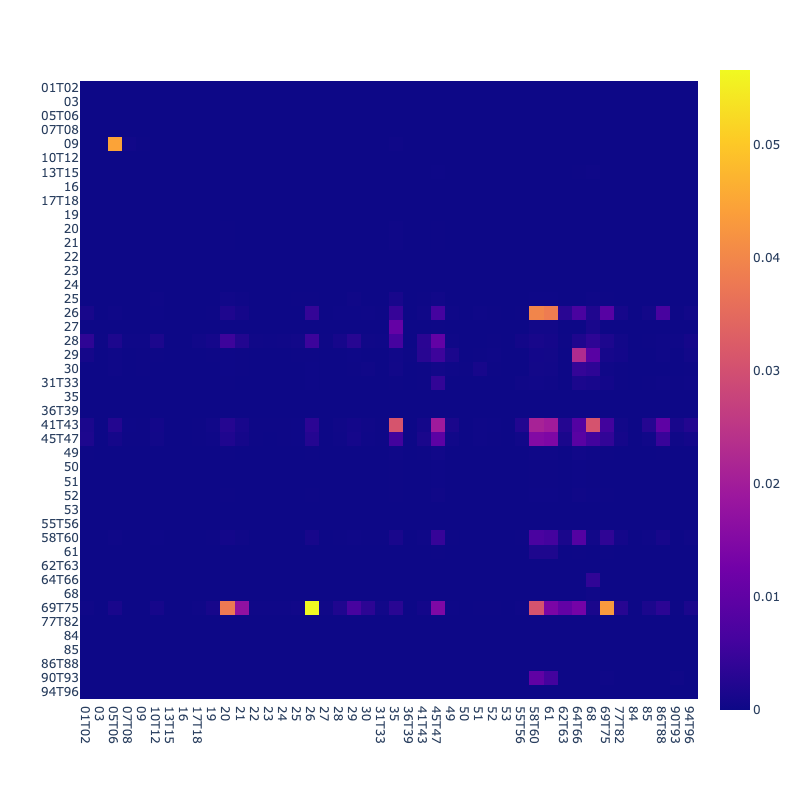

In [14]:
Image("investment_recipe.png") 

## Using Only ICIO Data

$I$ is the international investment matrix where $ai$ is the producing sector $i$ in country $a$ and $bj$ is the consuming sector $j$ in country $b$.

$$I_{(ai)(bj)}$$

We have $P_{(ai)b}$ from the ICIO, total production for each country/sector $ai$ that is consumed by each country $b$, and we have $R_{ij}$, the intensive form of the inter sectoral investment recipe based on Vom-Lehn Winberry where $\sum_{i,j}R_{ij}=1$. For each pair of countries $a_0$ and $b_0$, we use $P_{(ai)b}$ to empirically weight $R_{ij}$. We do this by taking the sum of $P_{(a_0i)b_0}$ which is the total investment flows produced by $a_0$ and consumed by $b_0$.

$$R_{i_0j_0}=R_{ij}\sum_{i}{P_{(a_0 i)b_0}}$$

This results in a sectoral investment matrix $R_{i_0j_0}$ between $a_0$ and $b_0$, where $i_0 \subset i$ and $j_0\subset j$ are the sectors corresponding to $a_0$ and $b_0$. This approach doesn't make use of the full granularity of the data since we're summing the total sectoral production for each pair of countries $P_{(ai)b}$. When done for all pairs of countries, $a$ and $b$, we get an extensive international investment matrix $I_{(ai)(bj)}$, such that each region of the matrix corresponding to pairs of countries $a_0$ and $b_0$ sum to $\sum_{i}{P_{(a_0 i)b_0}}$.

Finally, to get the country/sector $bj$ investment distributions, we divide each column of $I_{(ai)(bj)}$ by it's sum, so that the column sums are equal to 1.

### Inter Country Investment Flows Matrix (log $\sum_{i}{P_{(a i)b}}$)

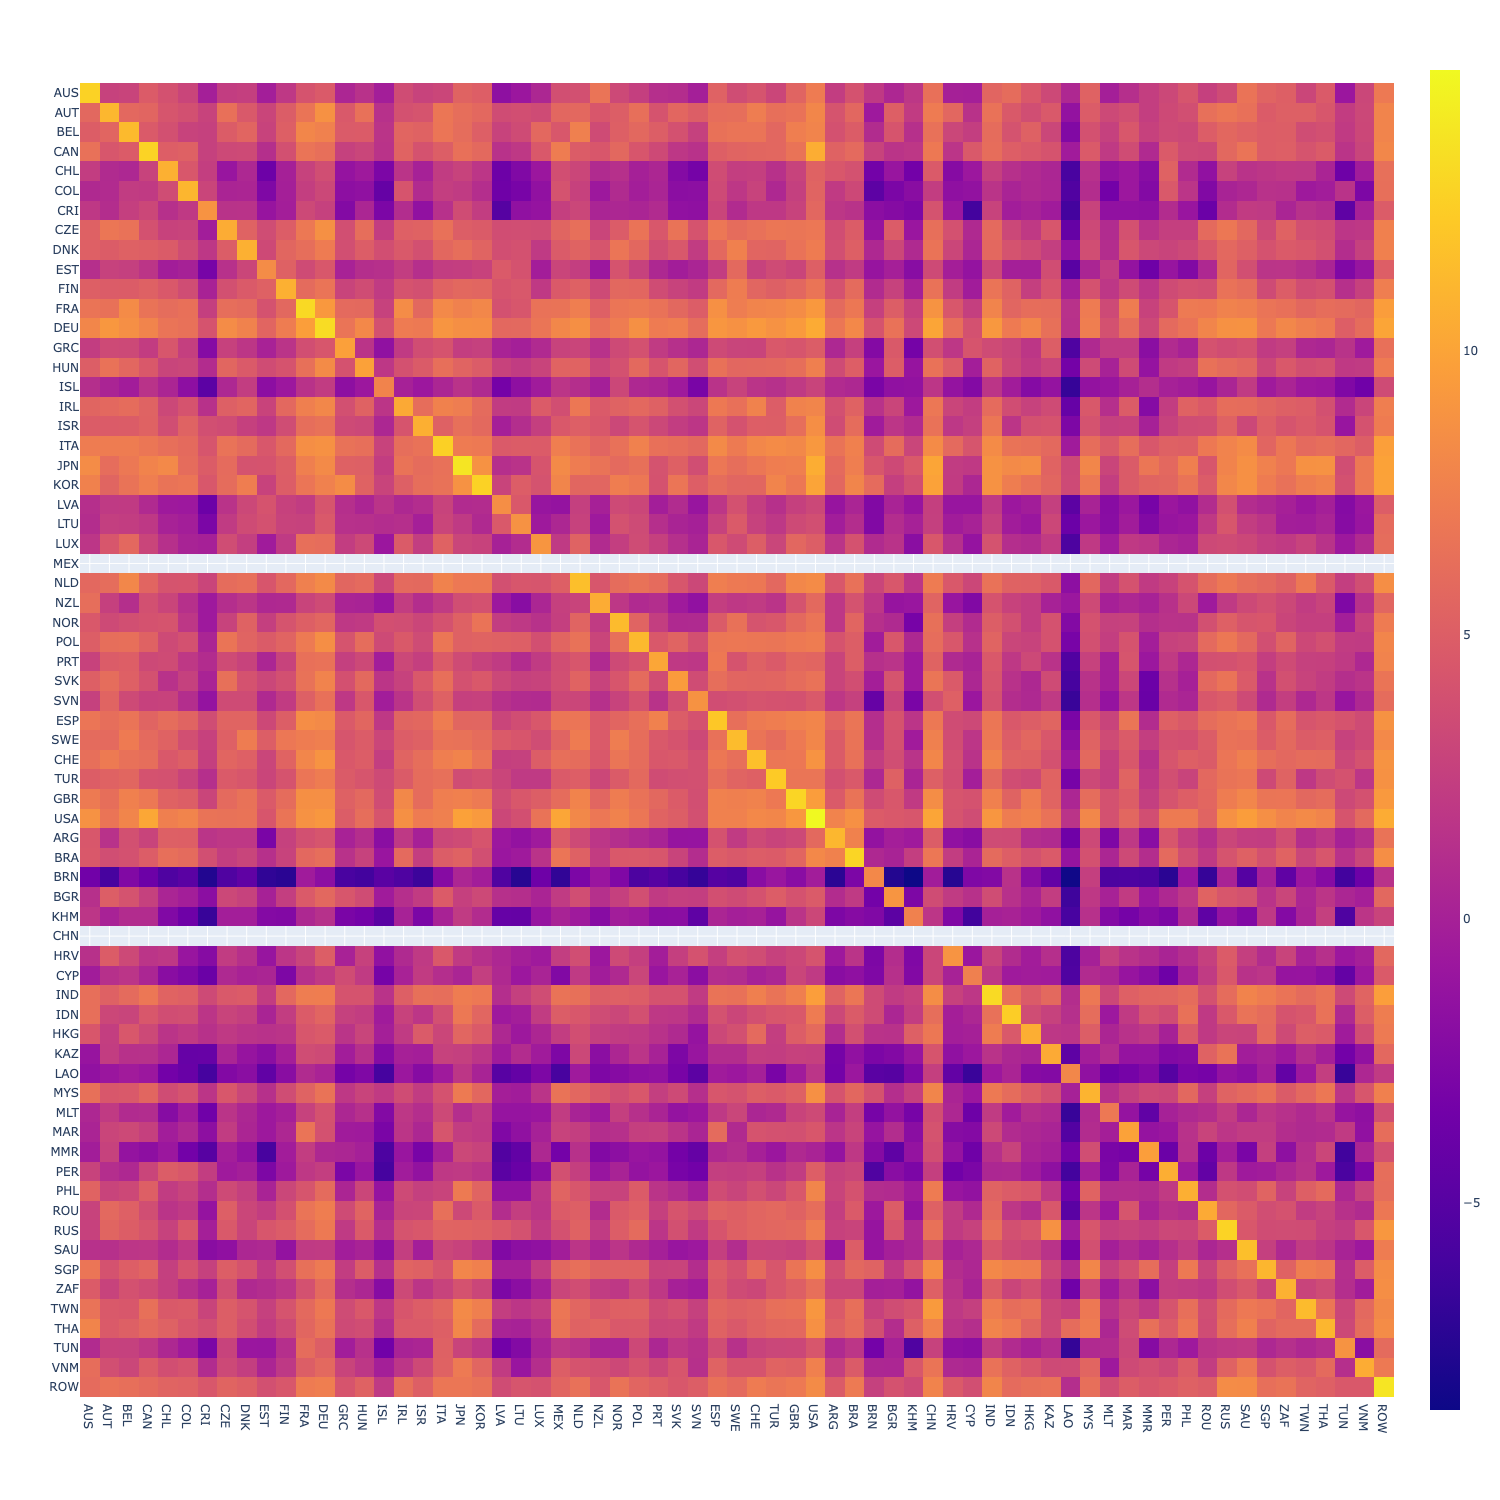

In [11]:
Image("international_flows.png", width=1000)

### ICIO-Only International Investment Matrix (log $I_{(ai)(bj)}$)

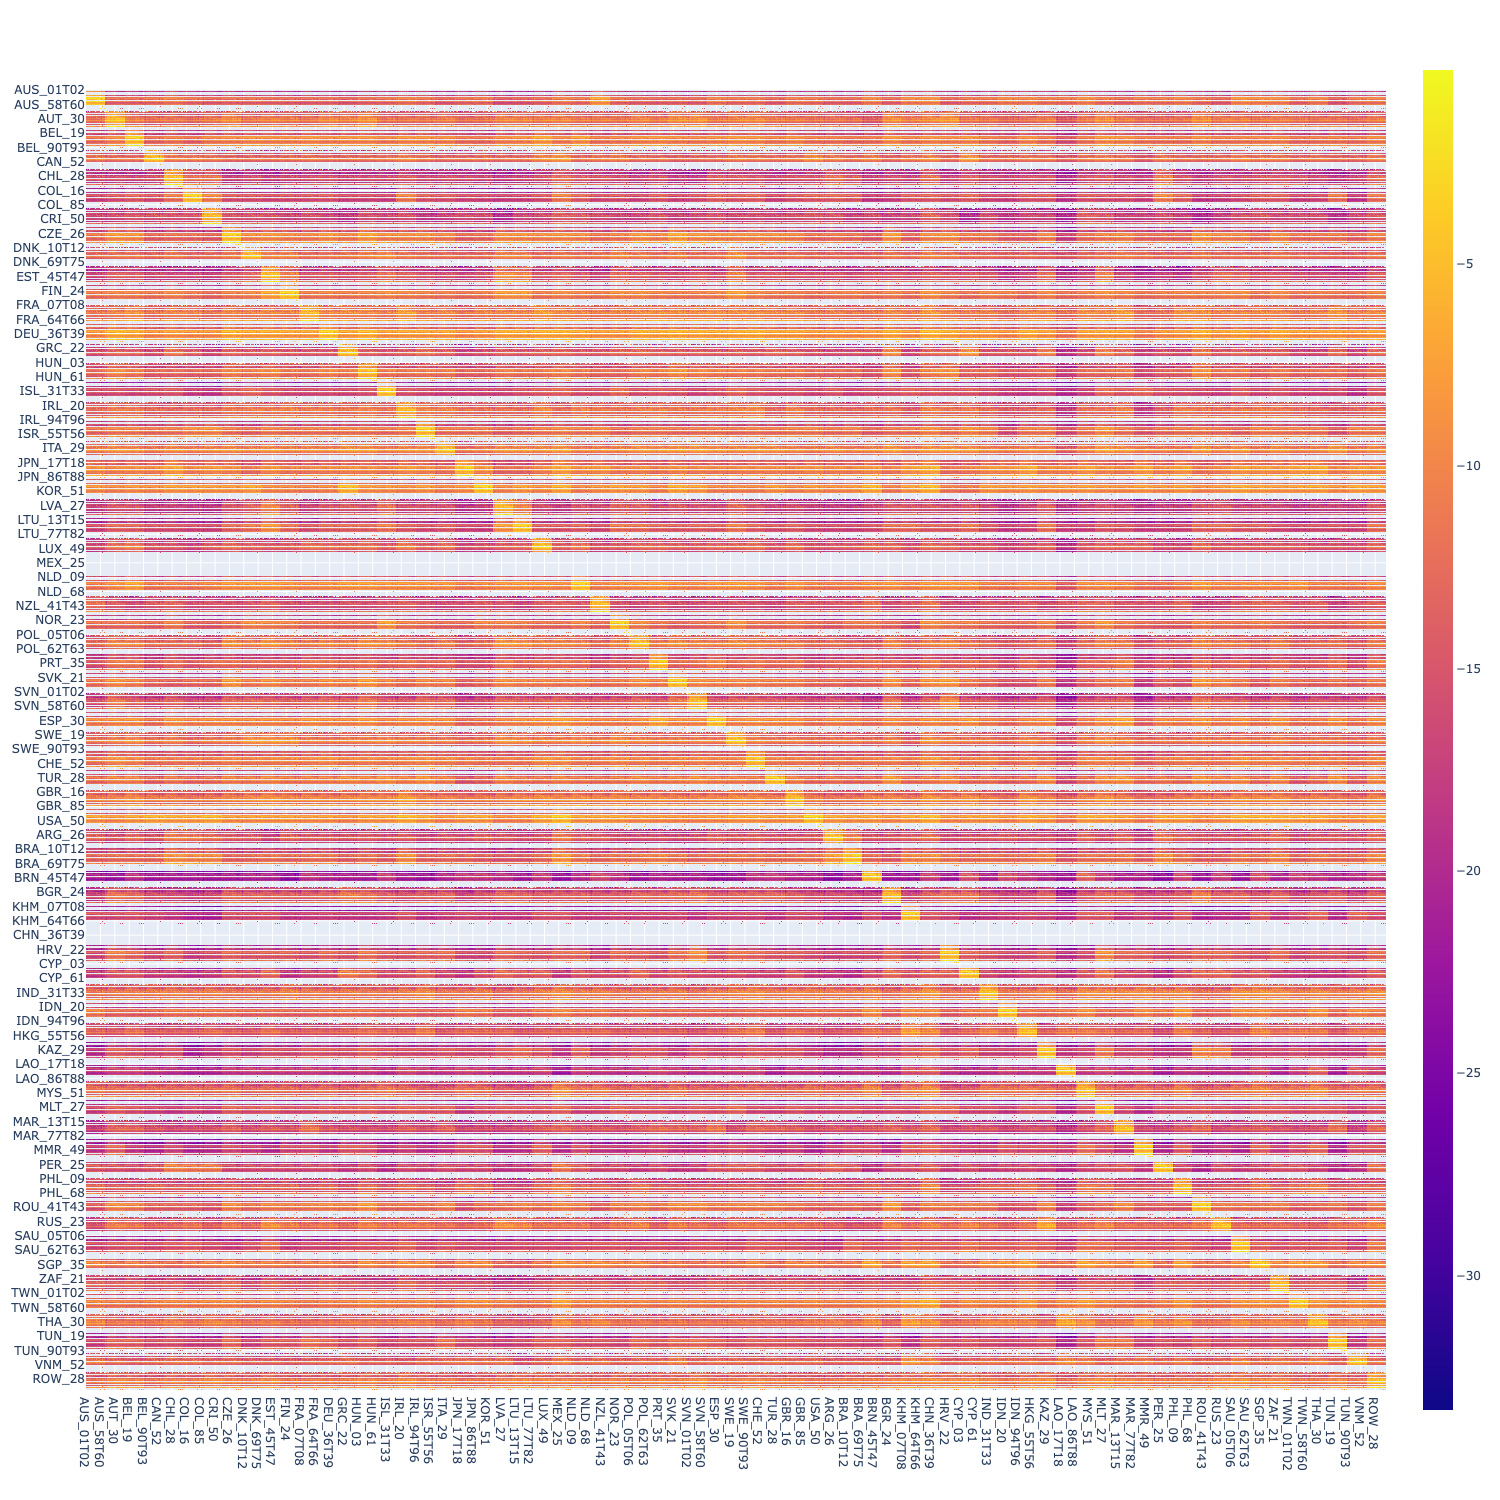

In [12]:
Image("icio_invmat.png", width=1000)

## Using OECD Capital Formation Data w/ Iterative Proportional Fitting

Again, $I$ is the international investment matrix where $ai$ is the producing sector $i$ in country $a$ and $bj$ is the consuming sector $j$ in country $b$.

$$I_{(ai)(bj)}$$

We have $P_{(ai)b}$ from the ICIO, total production for each country/sector $al$ that is consumed by each country $b$, and we have $R_{ij}$, the intensive form of the inter sectoral investment recipe based on Vom-Lehn Winberry where $\sum_{i,j}R_{ij}=1$. In addition, we use $E_{bj}$, total capital formation for each consuming country/sector $bj$, from the OECD. For each pair of countries $a_0$ and $b_0$, we can use these to get estimates for $I_{(a_0i)(b_0j)}$ using iterative proportional fitting. First, we take $P_{(a_0i)b_0}$ as the row margins (e.g. total production) then we calculate the column margins as: 

$$\hat{E}_{b_0j}=\frac{E_{b_0j}}{\sum_{j}{E_{b_0j}}}\sum_{i}{P_{(a_0i)b_0}}$$

This ensures that the sum of the column margins $\hat{E}_{b_0j}$ is equal to the sum of the row margins. In other words, we're scaling down total expenditure of the country $b_0$ to match the expenditure of $b_0$ from $a_0$. The implicit assumption here is that the expenditure makeup of $b_0$ is the same for each country $a$ that it is consuming from.

We can now perform iterative proportional fitting:

$$(1)\quad R_{i_0j_0(k+1)}=(\frac{R_{i_0j_0(k)}}{\sum_jR_{i_0j_0(k)}}) P_{(a_0l)b_0}$$

$$(2)\quad R_{i_0j_0(k+2)}=(\frac{R_{i_0j_0(k+1)}}{\sum_iR_{i_0j_0(k)}}) \hat{E}_{b_0j}$$

This results in a better estimated international investment network $I_{(ai)(bj)}$ where each country/sector, $ai$ and $bj$ has an estimated marginal production and cost, respectively from which estimates are derived.

### OECD Capital Formation International Investment Matrix (log $I_{(ai)(bj)}$)

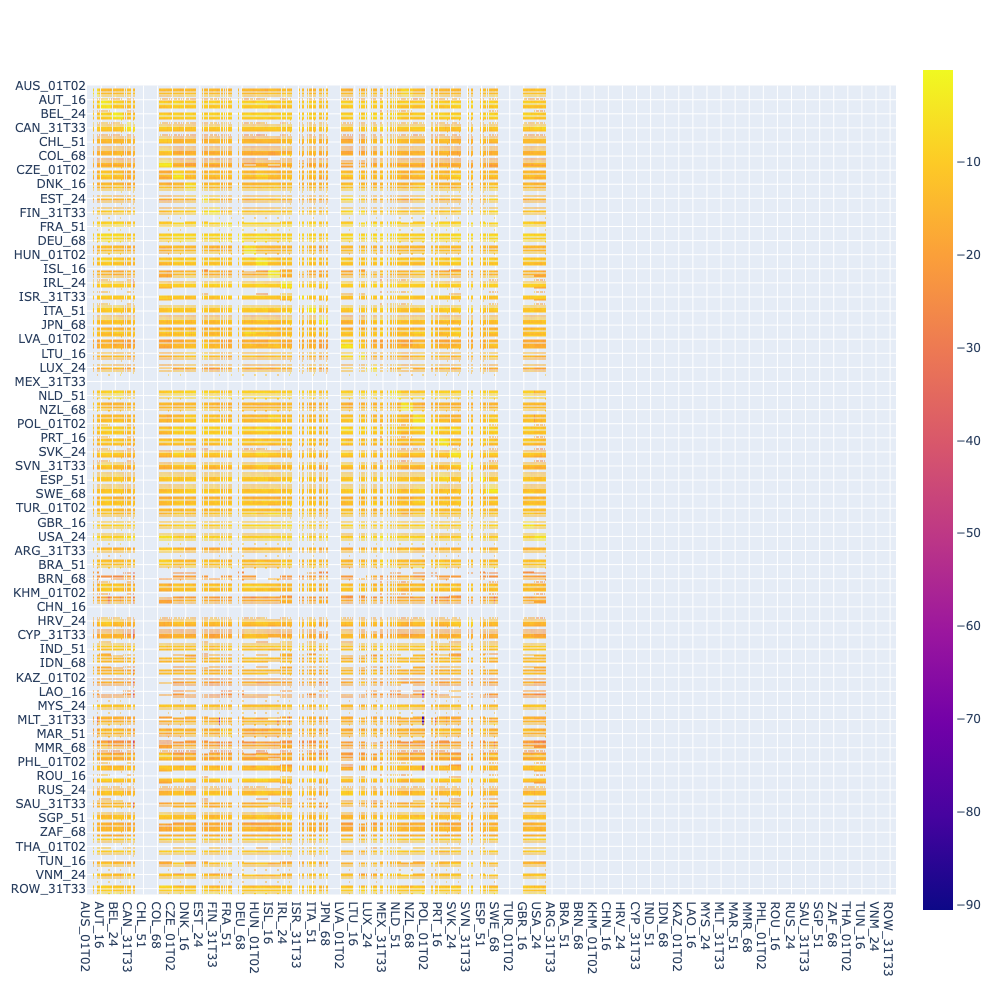

In [15]:
Image("iter_invmat.png") 